In [35]:
!pip install matplotlib
!pip install seaborn

# visualization with python libraries

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = './diamonds.csv' #diamonds.csv 파일 경로를 복붙해주세요!
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [38]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

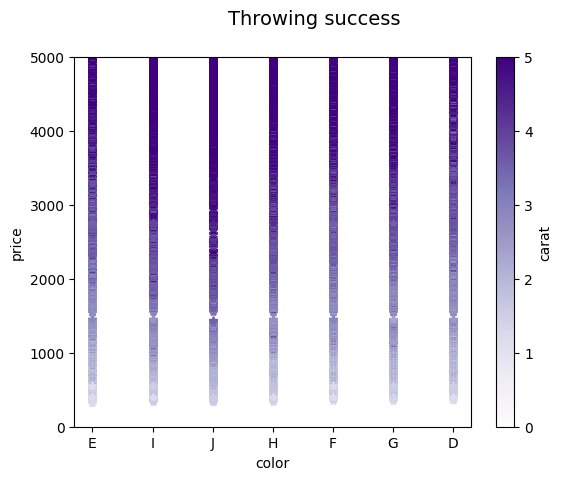

In [ ]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(color,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("color")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [ ]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

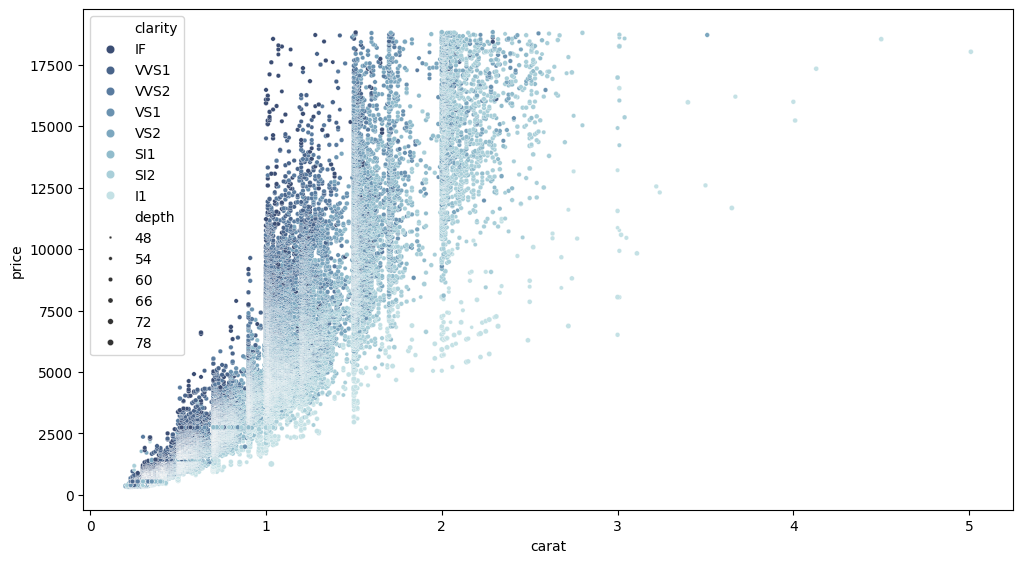

In [47]:
f, ax = plt.subplots(figsize=(12, 6.5))
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

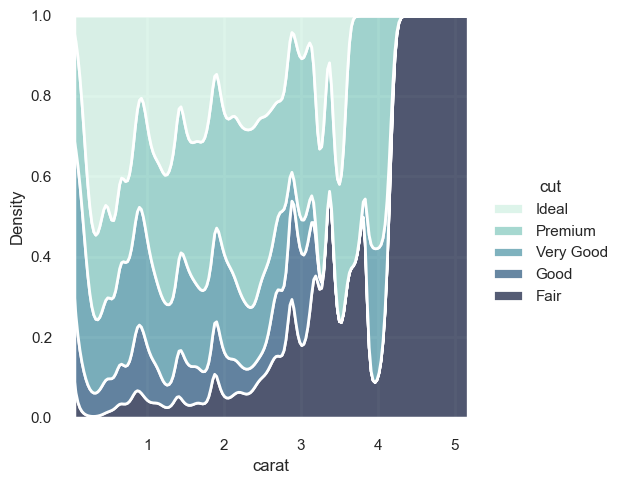

In [ ]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

*  1번 시각화는 컬러에 따른 캐럿수의 분포와 그들 각각의 가격을 보여주려는 시각화이지만, 각 요소들이 잘 구분되지 않아 양을 알아보기가 어렵다. 개선점: colorbar 말고 다른 plot 사용하기
*  2번 시각화는 캐럿별로 어떤 clarity를 가지는지 그 분포와, 그것들이 각각 어떤 가격을 갖는지 보여주려는 시각화이지만, clarity가 낮을수록 점이 안보여서 양을 비교하기가 어렵다. 개선점: 점을 잘 보이게 검은 테두리로 칠하기
*  3번 시각화는 캐럿과 Density에 따른 등급을 나타내려고 하는 시각화이고, 캐럿이 낮고 Density가 높을수록 등급이 올라간다는 정보를 잘 보여준다. 개선점: 제목 달기


2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

* scatter가 depth 작은건 아예 안보이는 수준이라 15\~35로 올렸고, 겹치는 현상을 최소화하기 위해 테두리 두께를 줄였다. 또한 clarity가 낮은 점들이 안보여서 전체적인 투명도를 낮추기 위해 alpha 값을 0.9로 올렸다. 그럼에도 x가 0~1인 부분은 점들이 너무 겹쳐서 알아보기 어려워 옆에 서브플롯을 하나 추가하여 보였다.

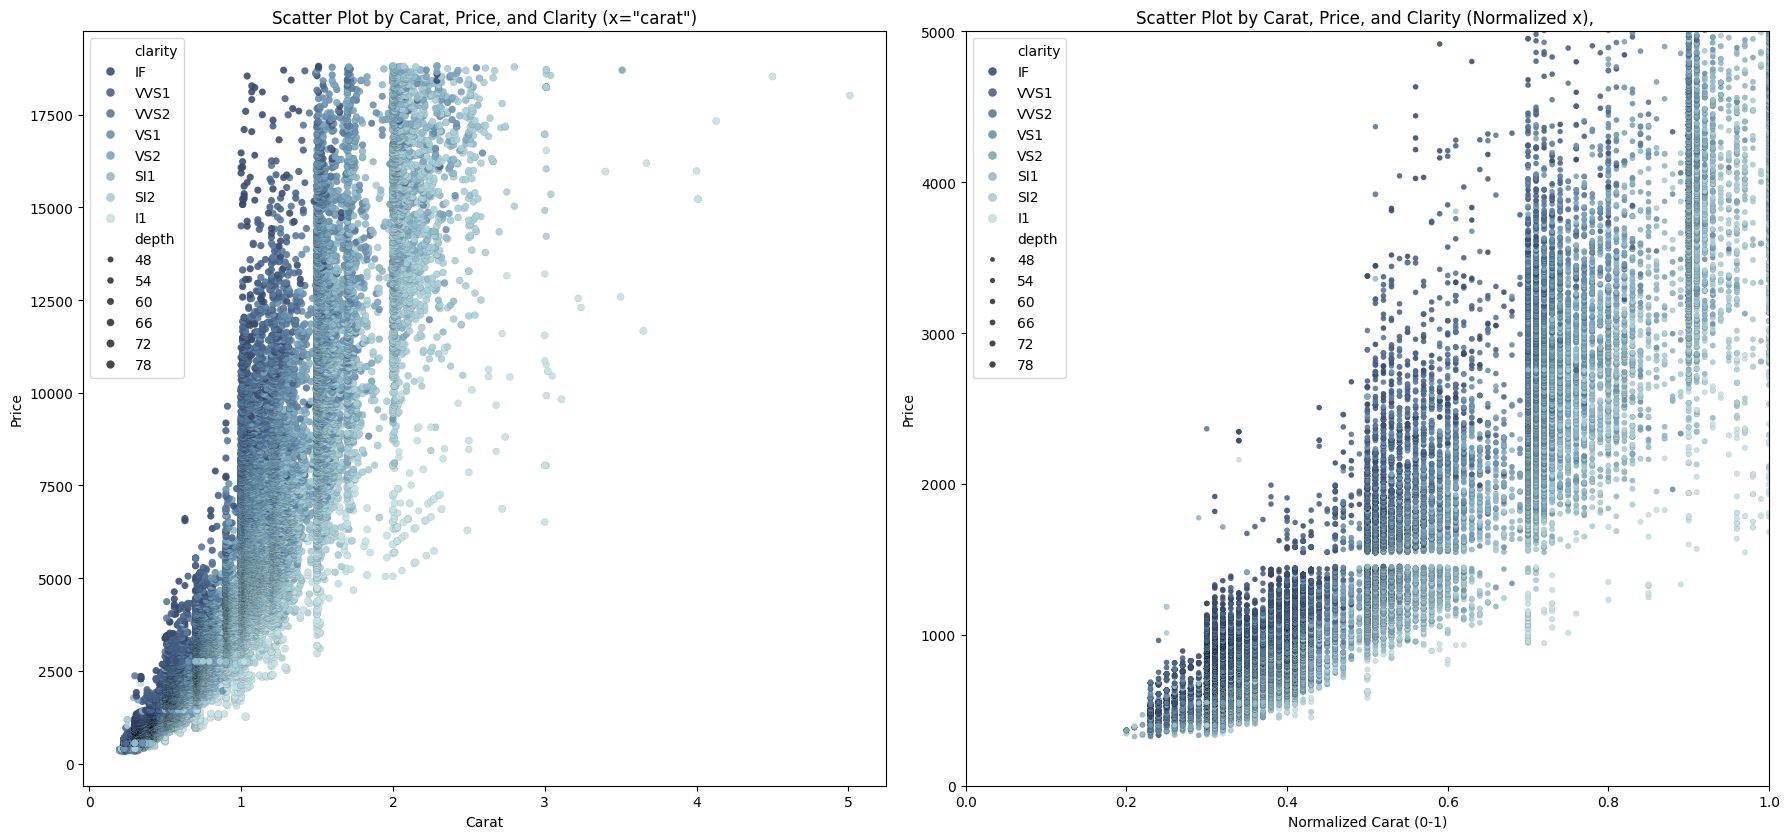

In [66]:
# 그래프 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8.5))

clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

# 첫 번째 서브플롯: x가 "carat"인 경우
scatter1 = sns.scatterplot(x="carat",
                           y="price",
                           hue="clarity",
                           size="depth",
                           palette="ch:r=-.2,d=.3_r",
                           hue_order=clarity_ranking,
                           sizes=(15, 35),
                           linewidth=0.05,
                           edgecolor='k',
                           alpha=0.9,
                           data=df, ax=axes[0])

axes[0].set_xlabel('Carat')
axes[0].set_ylabel('Price')
axes[0].set_title('Scatter Plot by Carat, Price, and Clarity ')

# 두 번째 서브플롯: x가 0~1인 경우
scatter2 = sns.scatterplot(x="carat",
                           y="price",
                           hue="clarity",
                           size="depth",
                           palette="ch:r=-.2,d=.3_r",
                           hue_order=clarity_ranking,
                           sizes=(10, 20),
                           linewidth=0.05,
                           edgecolor='k',
                           alpha=0.9,
                           data=df, ax=axes[1])

axes[1].set_xlabel('Normalized Carat (0-1)')
axes[1].set_ylabel('Price')
axes[1].set_title('Scatter Plot by Carat, Price, and Clarity (x 0~1), ')

# x축을 0~1로 정규화
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 5000)

plt.tight_layout()
plt.show()

# 시각화 추가과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


1. 리셀가가 치솟는 Yeezy의 원활한 공급을 위해 매장을 지을건데 어디에 지을까?
2. 지역별 총 구매 수와 판매가/발매가                                   
판매가와 발매가가 $를 포함한 string 형식으로 저장되어 있어 이를 떼어낸 후 나눠줘야 한다.
3. 매장은 구매수 1위에 판매가/발매가 5위인 California 혹은 구매수 3위에 판매가/발매가 6위인 Oregon에 짓는것이 좋을 것이다.
4. California에 매장을 짓고, boxplot을 보니 리셀가가 1.5\~2배인 신발들이 자주 거래됨을 알 수 있는데, 이를 참고하여 매장에 구비할 신발의 종류를 정해야겠다.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
try:
    df = sns.load_dataset("SDC")
except Exception as e:
        csv_path = './StockX-Data-Contest-2019-3.csv' #diamonds.csv 파일 경로를 복붙해주세요!
        df = pd.read_csv(csv_path)

df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71254 entries, 1 to 74179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    71254 non-null  object 
 1   Brand         71254 non-null  object 
 2   Sneaker Name  71254 non-null  object 
 3   Sale Price    71254 non-null  float64
 4   Retail Price  71254 non-null  object 
 5   Release Date  71254 non-null  object 
 6   Shoe Size     71254 non-null  float64
 7   Buyer Region  71254 non-null  object 
dtypes: float64(2), object(6)
memory usage: 4.9+ MB


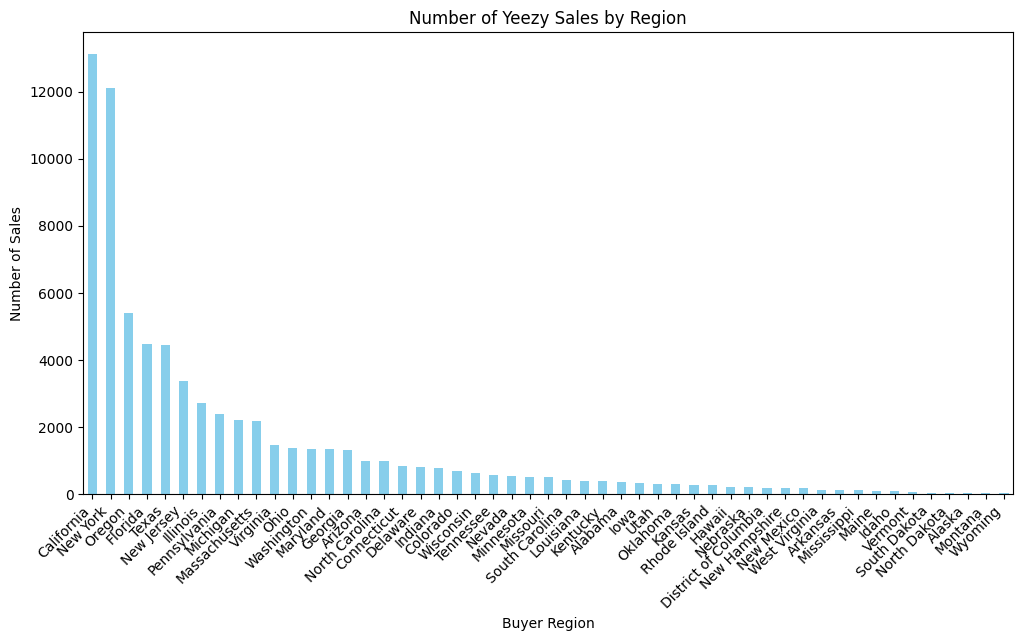

In [114]:
# 'Brand'가 'Yeezy'인 행만 선택
yeezy_df = df[df['Brand'] == ' Yeezy']

# 지역별 Sale 건수 계산
sales_count_by_region = yeezy_df.groupby('Buyer Region').size().sort_values(ascending=False)

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
sales_count_by_region.plot(kind='bar', color='skyblue')
plt.title('Number of Yeezy Sales by Region')
plt.xlabel('Buyer Region')
plt.ylabel('Number of Sales')
# x축 레이블 대각선으로 회전
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-113-82bf25dc3723>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  yeezy_df['Sale Price'] = pd.to_numeric(yeezy_df['Sale Price'].str.replace('$', ''), errors='coerce')
<ipython-input-113-82bf25dc3723>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yeezy_df['Sale Price'] = pd.to_numeric(yeezy_df['Sale Price'].str.replace('$', ''), errors='coerce')
<ipython-input-113-82bf25dc3723>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=

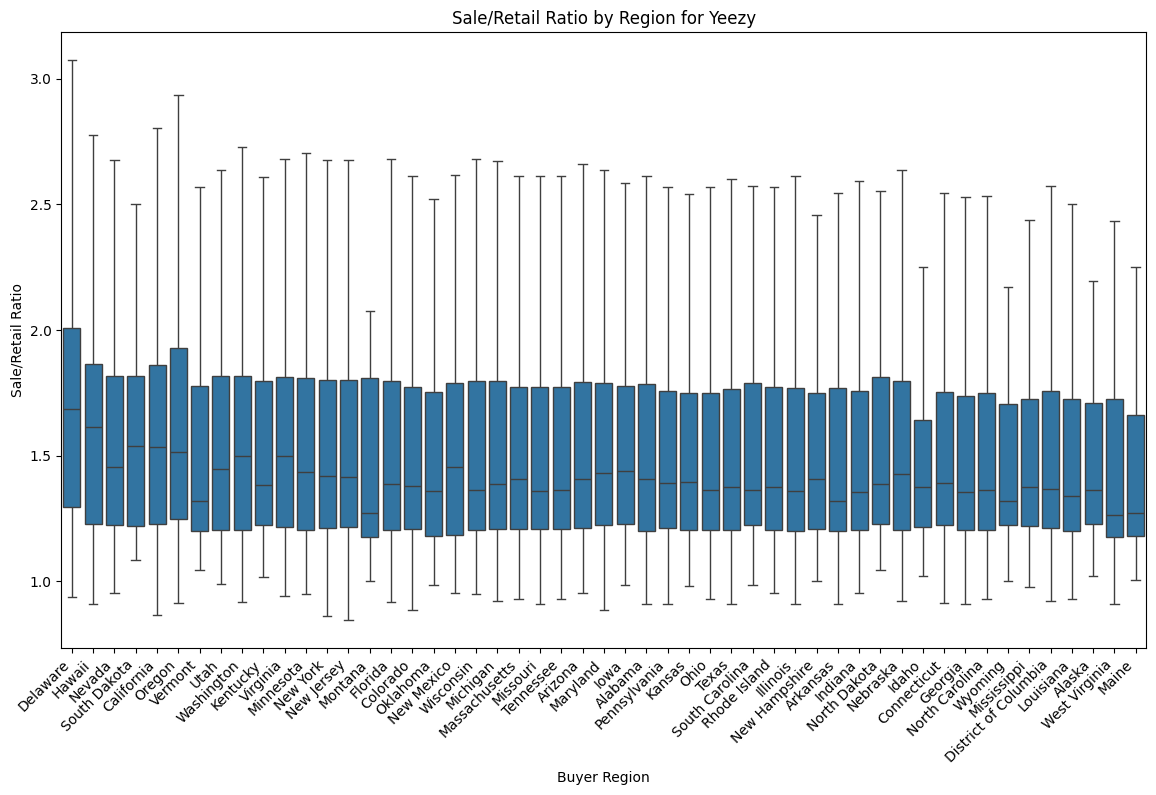

In [113]:
# 'Brand'가 'Yeezy'이면서 'Buyer Region'이 목록에 있는 값인 행만 선택
yeezy_df = df[df['Brand'] == ' Yeezy']

# 'Sale Price'와 'Retail Price'에서 $ 제거하고 숫자로 변환
yeezy_df['Sale Price'] = pd.to_numeric(yeezy_df['Sale Price'].str.replace('$', ''), errors='coerce')
yeezy_df['Retail Price'] = pd.to_numeric(yeezy_df['Retail Price'].str.replace('$', ''), errors='coerce')

# 'Sale Price'를 'Retail Price'로 나누어 새로운 컬럼 생성
yeezy_df['Sale/Retail Ratio'] = yeezy_df['Sale Price'] / yeezy_df['Retail Price']

# 지역별로 평균 ratio 계산
mean_ratios = yeezy_df.groupby('Buyer Region')['Sale/Retail Ratio'].mean().sort_values(ascending=False).index

# Matplotlib에서 이상점 표시 비활성화
plt.figure(figsize=(14, 8))
sns.boxplot(x='Buyer Region', y='Sale/Retail Ratio', data=yeezy_df, showfliers=False, order=mean_ratios)  # order 추가
plt.title('Sale/Retail Ratio by Region for Yeezy')
plt.xlabel('Buyer Region')
plt.ylabel('Sale/Retail Ratio')

# x축 레이블 대각선으로 회전
plt.xticks(rotation=45, ha='right')

plt.show()